<a href="https://colab.research.google.com/github/Akramraza12349/Projects/blob/main/Hand_On_Quiz_PCA_Learners_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------
## Context:
-----------------------------
In this case study, we will use the Air pollution dataset which contains information about 13 months of data on major pollutants and meteorological levels of a city. 

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and extract insights. 

## Importing libraries and overview of the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA and TSNE
from sklearn.decomposition import PCA

#### Loading data

In [ ]:
#Loading data
data= pd.read_csv("Air_Pollution.csv")

In [ ]:
data.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


#### Check the info of the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

- There are 403 observations and 27 columns in the data.
- All the columns except Date and Weather are of numeric data type.
- The Date and SrNo for all observations would be unique. We can drop these columns as they would not add value to our analysis.
- Weather is of object data type. We can create dummy variables for each category and convert it to numeric data type.
- The majority of the columns have some missing values.
- Let's check the number of missing values in each column.

In [ ]:
data.isnull().sum()

SrNo                  0
Date                  0
NO                    2
CO                    1
NO2                   2
O3                    6
SO2                   4
PM2.5                 2
Benzene               1
Toulene               1
P_Xylene             31
NOx                   2
PM10                  2
WindDirection         1
NH3                   2
RH                    1
Temp                  2
WindSpeed             1
VerticalWindSpeed     2
Solar                 2
BarPressure           2
Weather               0
PD_PM2.5             10
PD_PM10              11
PD_NO2               12
PD_SO2               13
PD_CO                11
dtype: int64

- All the columns except SrNo and Date have missing values.

#### Data Preprocessing

In [ ]:
data.drop(columns=["SrNo", "Date"], inplace=True)

In [ ]:
#Imputing missing values with mode(most frequent) for the Weather column and with median for all other columns
for col in data.columns:
    if col == "Weather":
        data[col].fillna(value=data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(value=data[col].median(), inplace=True)

In [ ]:
data["Weather"].unique()

array(['Summer', 'Monsoon', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [ ]:
#Creating dummy variables for Weather column
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,732.25,108.24,250.105,73.52,21.605,1.775,0,0,1,0
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,734.05,48.99,82.850,47.94,16.880,1.770,0,0,1,0
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,728.08,108.24,250.105,73.52,21.605,1.775,0,0,1,0
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,730.47,46.93,171.360,59.86,13.110,0.500,0,0,1,0
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,730.62,112.95,232.220,63.56,16.190,0.770,0,0,1,0


#### Scaling the data

### Question 1: Define Standard scaler and fit to the data_scaled

In [ ]:
scaler = ________
data_scaled = __________

In [ ]:
scaler =StandardScaler()
data_scaled = scaler.fit_transform(data)

StandardScaler(): The idea behind StandardScalar is that it will transform our data such that its distribution will have a mean value 0 and standard deviation of 1. We can see in our dataset that every column has different scale for example Barpressure varies between 721 to 736 whereas CO varies from 0.22 to 19.9. As these two features are in different scale they are standardized to have common scale while building machine learning model.

fit_transform(): This fit_transform method is basically the combination of fit method and transform method.This method performs fit and transform on the input data at a single time and converts the data points.

                  

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
data_scaled

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-0.762685,-0.274719,-1.028104,-0.176087,-0.360903,-0.966206,-1.005290,-0.726103,-0.766391,-1.006218,...,-0.175488,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
1,-0.765059,-1.244831,-1.131729,-1.256817,-0.367671,-0.832590,-0.839185,-0.586470,-0.817281,-1.018023,...,0.828051,-0.967381,-1.365729,-1.030531,-0.358008,-0.265288,-0.426401,-0.410019,1.37061,-0.39755
2,-0.758763,-1.069585,-0.565477,1.292291,-0.510985,-0.990760,-1.065691,-0.826253,-0.700079,-0.916904,...,-2.500352,-0.259436,-0.113049,-0.030312,-0.168884,-0.262123,-0.426401,-0.410019,1.37061,-0.39755
3,-0.759073,-0.900598,-0.421877,0.362069,-0.388372,-0.203844,-0.655463,-0.619211,-0.510398,-0.893437,...,-1.167876,-0.991995,-0.702821,-0.564440,-0.508908,-1.069106,-0.426401,-0.410019,1.37061,-0.39755
4,-0.751125,-1.082103,-0.482810,0.449383,-0.225551,-0.300152,-0.335838,-0.119422,-0.047760,-0.903606,...,-1.084248,-0.203159,-0.247001,-0.419764,-0.385627,-0.898215,-0.426401,-0.410019,1.37061,-0.39755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.340235,-0.812975,-0.076848,1.060245,-0.280090,1.875727,-0.959988,-0.715510,-0.505771,-0.458029,...,0.777874,0.378372,1.296989,-0.218391,-0.276755,-0.809606,-0.426401,-0.410019,1.37061,-0.39755
399,-0.690539,-0.875563,-1.100680,-0.323197,-0.072682,0.322992,-1.201595,-1.655384,-0.919061,-0.952957,...,0.526989,1.881486,2.480653,-0.072151,-0.276755,-0.809606,-0.426401,-0.410019,1.37061,-0.39755
400,-0.820278,-0.988221,-1.620747,2.175289,-0.471972,-0.793375,-1.392867,-1.655384,-1.104116,-1.160172,...,0.705396,0.324962,1.266581,-1.103651,-0.068217,-0.872898,-0.426401,-0.410019,1.37061,-0.39755
401,-0.482359,-0.587658,-0.509201,-0.496467,-0.309151,-0.854521,-1.085825,-0.910996,-0.704706,-0.664178,...,1.106811,-0.794129,-0.364513,-1.627612,-0.469682,-0.986825,-0.426401,-0.410019,1.37061,-0.39755


In [ ]:
# checking mean and standard deviation after standardarzing the data for "BarPressure"
print("Mean of BarPressure:",round(data_scaled["BarPressure"].mean(),1))
print("standardard deviation of BarPressure:",round(data_scaled["BarPressure"].std(),1))

Mean of BarPressure: 0.0
standardard deviation of BarPressure: 1.0


## Principal Component Analysis

### Question 2: Define PCA with n components and random_state =1 and fit to the scaled data.

In [ ]:
#Defining the number of principal components to generate 
n = data_scaled.shape[1]

#Finding principal components for the data
pca1 = PCA(__________)
data_pca = pd.DataFrame(pca1._________________)

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

In [ ]:
#Defining the number of principal components to generate 
n = data_scaled.shape[1]

#Finding principal components for the data
pca1 = PCA(n_components=n,random_state=1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled),columns=[f"PC{i+1}" for i in range(n)])

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

In [ ]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-2.742064,0.090409,-0.544034,-0.639932,1.305489,1.049067,-0.965436,0.103459,0.051540,0.198931,...,0.675502,0.804767,-0.665327,0.583680,-0.496965,0.237807,-0.311625,0.022113,-0.256680,-0.016397
1,-2.518826,1.834496,-0.820265,-0.125443,1.226361,0.136618,-0.763263,-1.243801,-0.533671,0.864223,...,0.488313,1.215222,-0.411048,0.421006,-0.146722,0.095045,-0.074077,-0.198902,-0.279627,-0.056044
2,-3.234021,-1.678367,0.109291,-0.832131,-0.425673,-0.604315,0.621228,0.278716,1.541888,0.131122,...,0.802738,0.111171,0.242053,0.430897,-0.351020,0.200112,-0.122626,-0.160006,-0.106472,0.030652
3,-2.722372,-0.876209,0.114949,-0.334952,-0.926435,-1.151151,0.121267,-0.785277,0.602173,-0.051567,...,0.372883,0.380353,0.109244,0.607604,-0.328072,0.150243,-0.260876,0.126214,-0.057704,0.025010
4,-1.952577,-1.032156,0.308900,-0.634766,-0.561540,-0.982848,0.067600,-0.769568,0.042768,0.356044,...,0.623313,-0.002952,0.282050,0.437699,-0.152451,0.206255,-0.137898,-0.130241,-0.113247,0.011455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.377477,-2.833380,-1.327138,-1.307556,-2.260970,-0.918250,-0.354822,0.298462,-0.452664,-0.731200,...,-0.272777,0.609752,0.268063,0.136613,0.547656,-0.631524,-0.298067,0.183220,-0.292562,0.134019
399,-1.613237,-2.343882,-2.457767,-1.958795,-2.468323,-0.127545,0.917422,1.306465,-0.475935,-0.187057,...,0.594204,0.025188,-0.652844,-0.277841,0.377907,-0.473787,-0.019883,-0.240223,0.163084,-0.022819
400,-3.872231,-1.990180,-2.550924,-0.897667,-0.366726,1.258623,-1.306530,1.251411,-0.912761,-1.663890,...,0.773632,0.278808,-0.790530,0.362298,0.026506,-0.182100,-0.650285,-0.060376,0.103009,-0.056261
401,-2.420606,0.912599,-1.106143,-0.130414,0.414722,0.241150,-0.850811,-1.268872,-0.386708,-0.215392,...,0.782070,0.310841,-1.065966,-0.236845,0.053271,-0.206459,-0.395384,0.074167,-0.152383,-0.041282


PCA(n_components=n,random_state=1): PCA() is used to project data into lower dimensions. Here,
n_component:is a parameter which is to set how many principal components we want, in our case we have set n_components to n which is all the features of dataset(28 features). We must keep in mind that n_components values should be less than or equal to the number of featues in dataset. 

*Note: if n_component is float in between 0 and 1,i.e, 0<n_components<1 , then PCA will select the number of components such that the amount variance that needs to be explainded. For example, if n_components=0.9, then the algorithm will select the number of components which will give the 90% variability in the data.

random_state=1, Setting random_state a fixed value will gaurantee that same sequence of random numbers are generated each time we run the code. And unless there is some other randomness present in the process, the result produced will be same as always. 

Here, pca1 is the object of the calss PCA(),

pca1.fit_transform(data_scaled): Fits the model with data_scaled and apply the dimensionality reduction on data_scaled. This returns a transformed values in array format with shape of (n_samples,n_components) refer data_pca dataframe above.

pca1.explained_variance_ratio_: returns a vector of the variance explained by each dimension, refer df dataframe below. 


In [ ]:
# dataframe of variance explanied by each PCA 
df=pd.DataFrame(exp_var1).T

In [ ]:
# renaming columns 
df.columns=[f"PC{i}" for i in range(1,29)]
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,0.401579,0.127644,0.076737,0.067495,0.043927,0.035598,0.031153,0.02781,0.023659,0.021582,...,0.00879,0.005839,0.005107,0.004302,0.003071,0.002585,0.002471,0.001676,0.000825,0.000505


Text(0, 0.5, 'Cumulative Explained Variance')

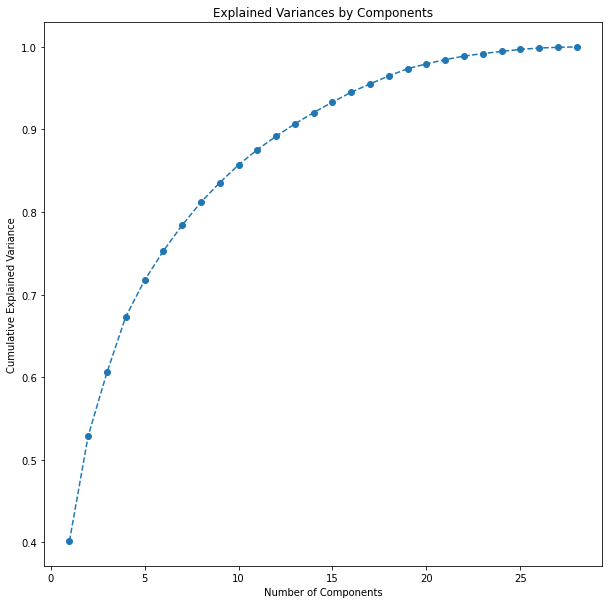

In [ ]:
# visulaize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,29), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

### Question 3: How many Principal components explains more than 70% variance in the dataset

In [ ]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
  sum = sum + i
  if(sum>________):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  5


In [ ]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
  sum = sum + i
  if(sum>0.70):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  5


variable exp_var1 is the array of variance explained in descending order for every PCs in fraction. So we have to sum up the variance explained till we get the total value of variance explained more than 0.7 and we have to return the index till then. Here ix+1 is returnd because index starts from 0. In this case 5 PCs will give variability more than 70%. We can cross verify this result from the above dataframe df (variance explained by each component).

In [ ]:
#Making a new dataframe with first 8 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5],2), index=data_scaled.columns, columns=cols)

In [ ]:
#Making a new dataframe with first 8 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:8],2), index=data_scaled.columns, columns=cols)

In [ ]:
pc1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
NO,0.25,-0.05,0.18,0.14,-0.13,0.15,0.04,-0.02
CO,0.21,0.04,0.18,-0.00,-0.03,0.30,-0.05,-0.03
NO2,0.19,-0.22,0.18,0.06,0.24,-0.23,-0.11,-0.10
O3,0.02,-0.38,-0.02,0.18,0.08,-0.23,-0.35,0.08
SO2,0.12,-0.19,-0.20,0.28,-0.11,0.19,-0.00,-0.38
PM2.5,0.26,-0.06,-0.10,-0.18,-0.14,-0.05,-0.01,-0.10
Benzene,0.27,0.09,0.15,0.01,-0.01,-0.07,-0.08,-0.00
Toulene,0.25,0.10,0.27,0.08,0.01,-0.04,-0.11,0.02
P_Xylene,0.25,0.07,0.22,0.03,-0.10,0.16,-0.00,-0.09
NOx,0.24,0.01,0.26,0.15,-0.12,0.14,-0.01,-0.03


pca1.components_ gives the set of all eigenvectors (aka loadings) for our projection space. we will get one eigenvector for each principal compoenents. If we look into PC1 we will find that the Benzene has highest positive correlation with PC1 followed by PM2.5, Toulene,P_Xylene etc. Weather_Spring has very less correlation(0.02) with PC1.

### Question 4 : Interpret the coefficients of Five principal components from the below dataframe.

In [ ]:
def color_high(val):
    if val <= -0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'   
    
pc1.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
NO,0.250000,-0.050000,0.180000,0.140000,-0.130000
CO,0.210000,0.040000,0.180000,-0.000000,-0.030000
NO2,0.190000,-0.220000,0.180000,0.060000,0.240000
O3,0.020000,-0.380000,-0.020000,0.180000,0.080000
SO2,0.120000,-0.190000,-0.200000,0.280000,-0.110000
PM2.5,0.260000,-0.060000,-0.100000,-0.180000,-0.140000
Benzene,0.270000,0.090000,0.150000,0.010000,-0.010000
Toulene,0.250000,0.100000,0.270000,0.080000,0.010000
P_Xylene,0.250000,0.070000,0.220000,0.030000,-0.100000
NOx,0.240000,0.010000,0.260000,0.150000,-0.120000


In [ ]:
def color_high(val):
    if val <= -0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'   
    
pc1.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
NO,0.250000,-0.050000,0.180000,0.140000,-0.130000,0.150000,0.040000,-0.020000
CO,0.210000,0.040000,0.180000,-0.000000,-0.030000,0.300000,-0.050000,-0.030000
NO2,0.190000,-0.220000,0.180000,0.060000,0.240000,-0.230000,-0.110000,-0.100000
O3,0.020000,-0.380000,-0.020000,0.180000,0.080000,-0.230000,-0.350000,0.080000
SO2,0.120000,-0.190000,-0.200000,0.280000,-0.110000,0.190000,-0.000000,-0.380000
PM2.5,0.260000,-0.060000,-0.100000,-0.180000,-0.140000,-0.050000,-0.010000,-0.100000
Benzene,0.270000,0.090000,0.150000,0.010000,-0.010000,-0.070000,-0.080000,-0.000000
Toulene,0.250000,0.100000,0.270000,0.080000,0.010000,-0.040000,-0.110000,0.020000
P_Xylene,0.250000,0.070000,0.220000,0.030000,-0.100000,0.160000,-0.000000,-0.090000
NOx,0.240000,0.010000,0.260000,0.150000,-0.120000,0.140000,-0.010000,-0.030000


*Note:or The larger the absolute value of the coefficient, the more important the corresponding variable is in calculating the component.

PC1: for PC1 the variables NO,PM2.5,Benzene,Toulene,P_Xylene has positve correlation coefficients of 0.25 or more which means first principal compoent will increase with increase in theses parameters. We can also see that coefficient of 0.02 for weather_Spring which means weather_spring has negligible impact on PC1.

PC2: For PC2, RH and Weather_Monsoon is positively correlated with coefficeint of 0.46 and 0.36 respectively. While PC2 is negatively correlated with O3 and Weather_Summer With coefficient of -0.38 and -0.33 respectively.NOx has nearly negligble effect on PC2.

PC3: Toluene, Nox,Temp,VerticalWindSpeed is positively correlated with PC3.While windspeed, Barpressure and weathe_winter is negative correlated with PC3.

PC4: Weather_Spring,BarPressure,SO2 is positively correlated with PC4 whereas Weather_Summer and Weather_winter are negatively correlted with PC4. We can also notice that coefficient of CO is 0 which means PC4 is unaffected by variable CO.

PC5: WindDirection and solar is negatively correlated with PC5. Whereas VerticalWindSpeed,PD_NO2,weather_Spring is positively correlated with PC5.



In [ ]:
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(25,15))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

In [ ]:
pca=pca1.fit_transform(data_scaled)

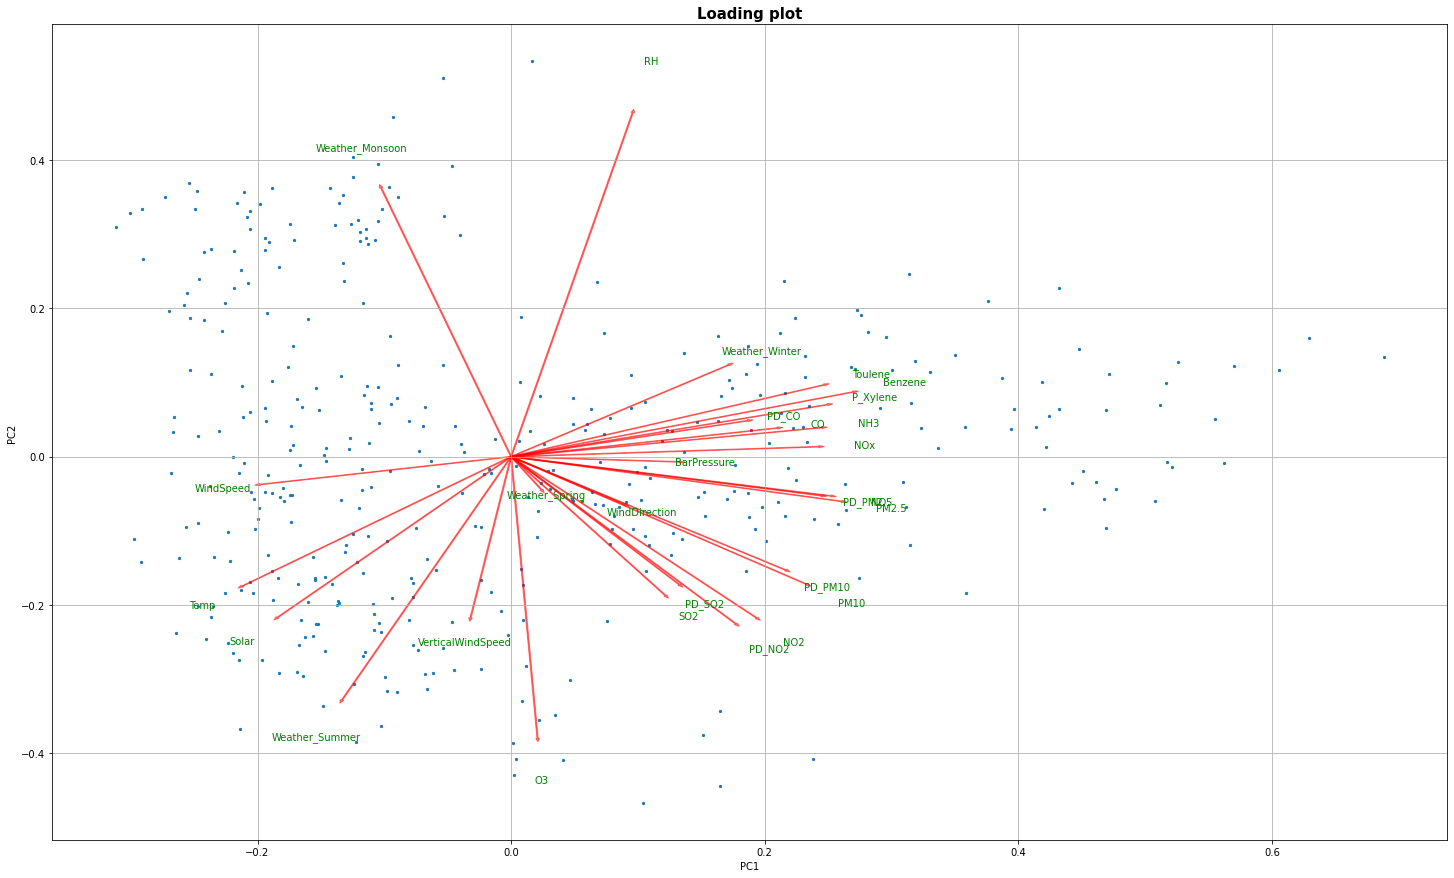

In [ ]:
myplot(pca[:,0:2],np.transpose(pca1.components_[0:2, :]),list(data_scaled.columns))
plt.title("Loading plot",weight="bold",fontsize=15)
plt.show()

laoding plot shows how strongly each variable influences a principal component. Their project values on each PC shows how much weight they have on that PC.We can see from the laoding plot Benzene,Toluene,P_xylene,PM2.5 strongly influence PC1. Whereas RH,Wether_Monsoon,O3 strongly influence PC2.